In [6]:
from datasets import load_dataset
from PIL import Image

In [2]:
import logging
logging.getLogger("huggingface_hub").setLevel(logging.DEBUG)
from datasets import load_dataset
ds = load_dataset("zh-plus/tiny-imagenet", token=os.getenv("HF_TOKEN"))

Request 83056078-ca6c-43ee-ba08-93e48d732d24: HEAD https://huggingface.co/datasets/zh-plus/tiny-imagenet/resolve/main/README.md (authenticated: True)
Request 98cbb7d6-0ffb-4b90-8672-d3e22dfd658f: HEAD https://huggingface.co/api/resolve-cache/datasets/zh-plus/tiny-imagenet/5a77092c28e51558c5586e9c5eb71a7e17a5e43f/README.md (authenticated: True)
Request ab5e516a-e64c-4159-9b8f-e91159aacb2a: HEAD https://huggingface.co/datasets/zh-plus/tiny-imagenet/resolve/5a77092c28e51558c5586e9c5eb71a7e17a5e43f/tiny-imagenet.py (authenticated: True)
Request 75b5e4be-d4e3-481b-aecf-d09436c245ea: HEAD https://s3.amazonaws.com/datasets.huggingface.co/datasets/datasets/zh-plus/tiny-imagenet/zh-plus/tiny-imagenet.py (authenticated: False)
Request fd4ae529-d155-42fe-b820-7cc7749e1d4d: GET https://huggingface.co/api/datasets/zh-plus/tiny-imagenet/revision/5a77092c28e51558c5586e9c5eb71a7e17a5e43f (authenticated: True)
Request 9a550e33-dd66-4baf-8e63-faeada6c0d95: HEAD https://huggingface.co/datasets/zh-plus/ti

In [3]:
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 100000
    })
    valid: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})

In [4]:
ds['train'][0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64>,
 'label': 0}

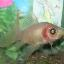

In [16]:
ds['train'][0]['image']

In [18]:
ds['train'][0]['label']

0

In [30]:
type(ds['train']['label'])

list

In [33]:
vocab_size = len(set(ds["train"]["label"]))

vocab_size

200

In [37]:
type(ds["train"]['image'])

list

In [44]:
from PIL import Image

# Assuming 'ds' is your dataset and ds["train"]["image"] provides PIL Image objects
# If ds["train"]["image"] provides file paths, the original code (with a slight modification) is more appropriate.
# Let's assume for this solution that ds["train"]["image"] yields PIL Image objects directly.

images = ds["train"]["image"]
sizes = set()

for image in images:
    try:
        # If 'image' is already a PIL Image object, directly access its 'size' attribute.
        sizes.add(image.size)
    except Exception as e:
        # This error handling might still be useful if some elements in 'images' are malformed
        # or not actually PIL Image objects when expected.
        print(f"Error processing image object {image}: {e}")

print(sizes)

{(64, 64)}


In [45]:
from PIL import Image

# Assuming 'ds' is your dataset and ds["train"]["image"] provides PIL Image objects
# If ds["train"]["image"] provides file paths, the original code (with a slight modification) is more appropriate.
# Let's assume for this solution that ds["train"]["image"] yields PIL Image objects directly.

images = ds["valid"]["image"]
sizes = set()

for image in images:
    try:
        # If 'image' is already a PIL Image object, directly access its 'size' attribute.
        sizes.add(image.size)
    except Exception as e:
        # This error handling might still be useful if some elements in 'images' are malformed
        # or not actually PIL Image objects when expected.
        print(f"Error processing image object {image}: {e}")

print(sizes)

{(64, 64)}


In [49]:
import torch
from PIL import Image
import numpy as np

# Convert PIL Image to tensor
pil_image = ds["train"]["image"][0]
x = torch.tensor(np.array(pil_image))

In [ ]:
x/255.0

tensor([[[1.0000, 0.5333, 0.7569],
         [1.0000, 0.5412, 0.7529],
         [0.9765, 0.5725, 0.7804],
         ...,
         [0.8157, 0.9294, 0.9216],
         [0.8196, 0.9451, 0.9412],
         [0.4980, 0.6392, 0.6314]],

        [[1.0000, 0.4941, 0.7412],
         [0.9961, 0.5020, 0.7412],
         [0.9647, 0.5373, 0.7608],
         ...,
         [0.8039, 0.9059, 0.9020],
         [0.7922, 0.9176, 0.9059],
         [0.4824, 0.6235, 0.6078]],

        [[1.0000, 0.4941, 0.7882],
         [1.0000, 0.5059, 0.7882],
         [1.0000, 0.5294, 0.7961],
         ...,
         [0.8118, 0.9137, 0.9020],
         [0.7922, 0.9176, 0.8980],
         [0.4706, 0.6078, 0.5843]],

        ...,

        [[0.3725, 0.4784, 0.2784],
         [0.3647, 0.4667, 0.2784],
         [0.3647, 0.4549, 0.2745],
         ...,
         [0.3333, 0.2902, 0.2196],
         [0.3059, 0.2627, 0.1922],
         [0.3686, 0.3255, 0.2549]],

        [[0.3490, 0.4588, 0.2588],
         [0.3490, 0.4510, 0.2627],
         [0.